(nonlinearity:exercise)=
### Von-May function

**Task 1**: Write a function which solves the Von-May-Equation.


**Problem description:**

<blockquote>The starting point for our analysis is the ‘Von-May-Equation’, which is given by <br>

    
**\begin{align}    
y_{t+1} = r \cdot y_{t} \cdot (1-y_{t}),
\end{align}**

with  $r$ an pre-defined parameter and $y$ the function value at time $t$ and $t+1$.</blockquote>

In [1]:
import matplotlib.pyplot as plt

def von_may(now,r, iters=100):
    vals=[now]
    for i in range(iters-1):
        now = r * now * (1 - now)
        vals.append(now)
    
    return vals



**Task 2:** Run the code for several initial and parameter combination. What is particularly striking about increasing r-values?


```
y(0)=0.5 and r=2.80 (alternatively, use y(0)=0.9) 
y(0)=0.5 and r=3.30 (alternatively, use y(0)=0.9) 
y(0)=0.5 and r=3.95 (alternatively, use y(0)=0.495) 
y(0)=0.8 and r=2.80 

```

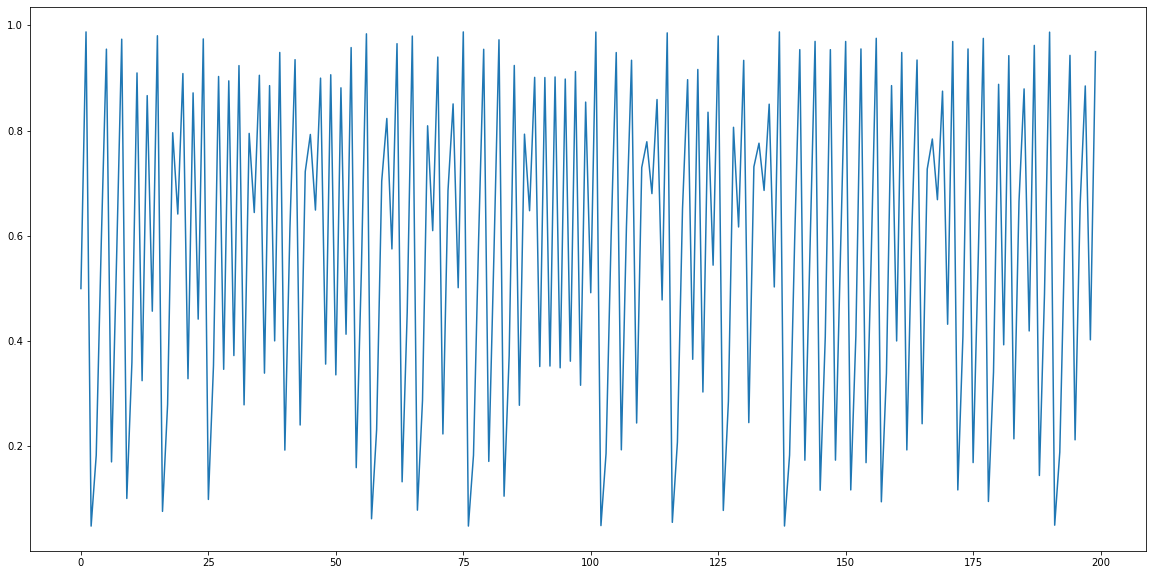

In [2]:
# Integrate the equation and plot the results
y0 = 0.5
r = 3.95

plt.figure(figsize=(20, 10))
plt.plot(von_may(y0, r, iters=200))

**Extend the Von-May function**

**Task 3:** Extend this Von-May function by generating 20 random r-values and run simulations with them. Sample the values from a normal distribution with mean 3.95 and standard deviation 0.015 (limit the r-values between 0 and 4). Then average over all time series. Plot both the time series, the averaged time series and the histogram of the averaged time series. What do you observe?

In [3]:
import numpy as np

def ensemble_may(n, y0, r, iters):
    arr = np.empty(shape=(r.shape[0], iters))
    for idx, r_run in enumerate(r):
        arr[idx, :] = von_may(y0, r_run, iters=iters)
    
    means = np.mean(arr, axis=0)
    return arr, means


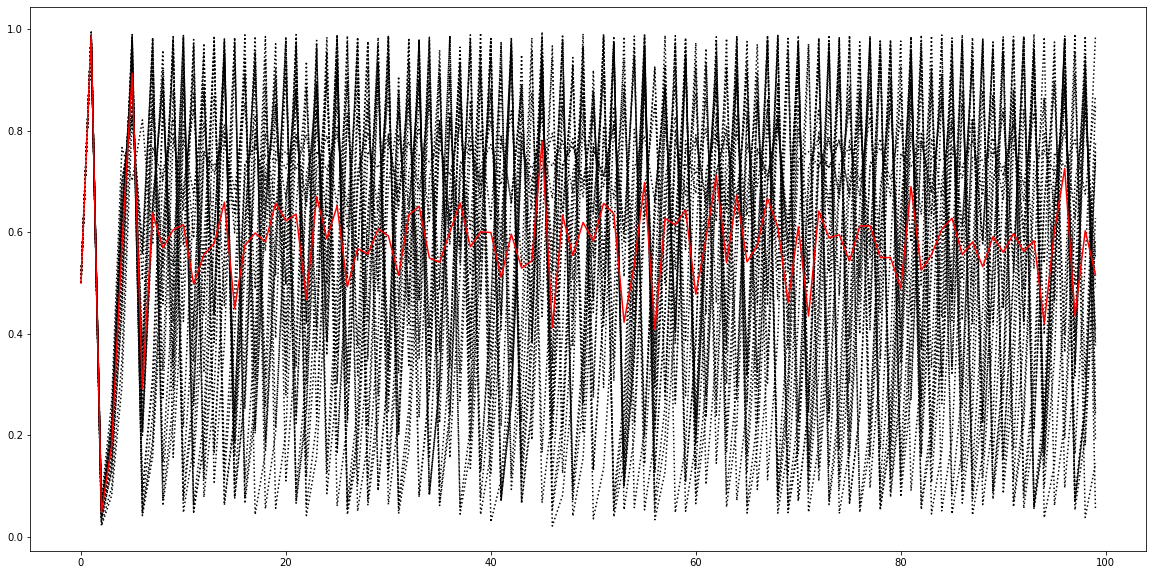

In [4]:
# Plot the results
y0 = 0.5
runs = 20
r = np.clip(np.random.normal(loc=3.95, scale=0.015, size=runs), a_min=0, a_max=4)
iters = 100

ensemble_arr, means_arr = ensemble_may(5, y0, r, iters=iters)
plt.figure(figsize=(20,10))
plt.plot(ensemble_arr.T, ':k')
plt.plot(means_arr, 'r')

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  4.,  2.,  1.,  3.,  3.,  4.,  4.,
         9., 10., 12., 14.,  8.,  7.,  7.,  2.,  2.,  1.,  1.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([0.04779921, 0.0665978 , 0.08539639, 0.10419497, 0.12299356,
        0.14179215, 0.16059073, 0.17938932, 0.19818791, 0.21698649,
        0.23578508, 0.25458367, 0.27338225, 0.29218084, 0.31097943,
        0.32977801, 0.3485766 , 0.36737519, 0.38617377, 0.40497236,
        0.42377095, 0.44256953, 0.46136812, 0.48016671, 0.49896529,
        0.51776388, 0.53656247, 0.55536105, 0.57415964, 0.59295823,
        0.61175681, 0.6305554 , 0.64935399, 0.66815257, 0.68695116,
        0.70574975, 0.72454834, 0.74334692, 0.76214551, 0.7809441 ,
        0.79974268, 0.81854127, 0.83733986, 0.85613844, 0.87493703,
        0.89373562, 0.9125342 , 0.93133279, 0.95013138, 0.96892996,
        0.98772855]),
 <BarContainer

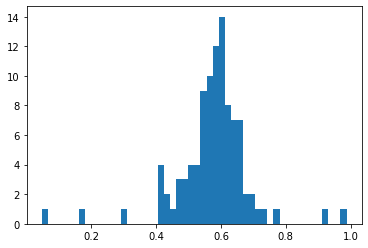

In [5]:
plt.hist(means_arr, bins=50)

**Revisit the EBM-Model**

Include a dynamic transmissivity in the energy balance model.

**Task 4:** Run the energy balance model $T(0)=288 ~ K$, $C_w= 2\cdot10^8 ~ J/(m^2
 57 \cdot K)$, $\alpha=0.3$, and $\tau_{mean}=0.608 (\pm 10\%)$

In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt

def OLR(T, trans):
    """ Stefan-Boltzmann law """
    sigma = 5.67e-8
    return(trans * sigma * T**4)


def ASR(albedo, incoming):
    return incoming * (1 - albedo)


def step_forward(Q, T, Cw, alpha, tau, dt):
    return (ASR(alpha, Q) - OLR(T, tau)) * dt / Cw + T


def ebm_stochastic(T0, Q=341.3, Cw=10e8, alpha=0.3, tau=0.64, years=100):
    temps_arr = np.empty(years + 1)
    years_arr = np.arange(0, years+1)

    temps_arr[0] = T0
    dt = 365 * 24 * 60 * 60
    
    for idx, temp_now in enumerate(temps_arr[:-1]):
        tau_rand = np.random.normal(tau, tau/10)
        temps_arr[idx + 1] = step_forward(Q, temp_now, Cw, alpha, tau_rand, dt)
    
    return temps_arr, years_arr
        

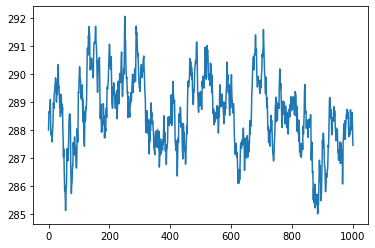

In [7]:
# Plot the results
plt.plot(ebm_stochastic(T0=288, Cw=2*10e8, tau=0.608, years=1000)[0])

**Extend the model with a simple ice/land use albedo parameterisation. (sigmoid version)**

**Task 5:** In this parameterisation, the albedo is solely a function of mean temperature. As a non-linear function we assume a sigmoid function with

\begin{align}
\alpha(T_i) = 0.3 \cdot (1-0.2 \cdot \tanh(0.5 \cdot (T_i-288))).
\end{align}

Run the energy balance model for 100 years with four different initial conditions for T(0)=286.0, 287.9, 288.0, and 293.0 K, while fixing the other parameters to $C_w$= 2$\cdot10^8$ J/(m$^2 \cdot$ K) and $\tau_{mean}$=0.608. 

What can be said about the state of equilibrium?

In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt


def ebm_ice_albedo(T0, Q=341.3, Cw=10e8, tau=0.64, years=100):
    
    def step_forward_albedo_sig(Q, T, Cw, tau, dt):
        alpha = .3 * (1 - 0.2 * np.tanh(0.5*(T-288)))
        temp = (ASR(alpha, Q) - OLR(T, tau)) * dt / Cw + T
        return temp, alpha
    
    temps_arr = np.empty(years + 1)
    albedo_arr = np.empty(years + 1)
    years_arr = np.arange(0, years+1)

    temps_arr[0] = T0
    dt = 365 * 24 * 60 * 60
    
    for idx, temp_now in enumerate(temps_arr[:-1]):
        tau_rand = np.random.normal(tau, tau/10)
        temps_arr[idx + 1] = step_forward_albedo_sig(Q, temp_now, Cw, tau_rand, dt)[0]
        albedo_arr[idx + 1] = step_forward_albedo_sig(Q, temp_now, Cw, tau_rand, dt)[1]
    return temps_arr, years_arr, albedo_arr

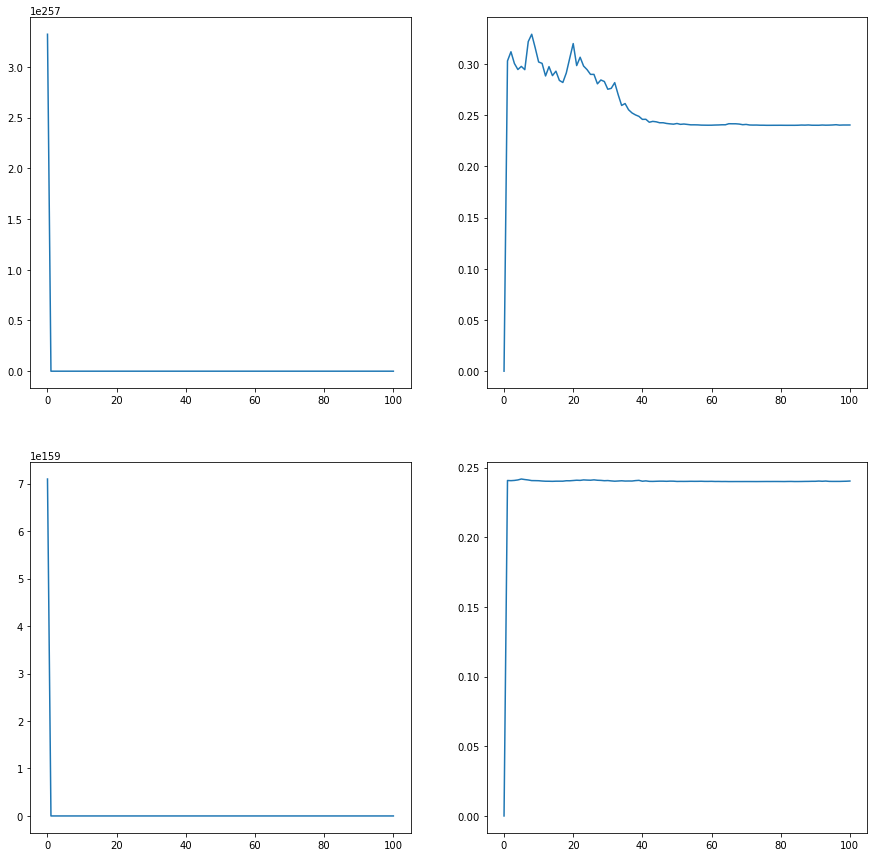

In [9]:
# Plot the albedo function
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)
plt.plot(ebm_ice_albedo(286, Q=341.3, Cw=2*10e8, tau=0.608, years=100)[2].T)
plt.subplot(2, 2, 2)
plt.plot(ebm_ice_albedo(287.9, Q=341.3, Cw=2*10e8, tau=0.608, years=100)[2].T)
plt.subplot(2, 2, 3)
plt.plot(ebm_ice_albedo(288, Q=341.3, Cw=2*10e8, tau=0.608, years=100)[2].T)
plt.subplot(2, 2, 4)
plt.plot(ebm_ice_albedo(293, Q=341.3, Cw=2*10e8, tau=0.608, years=100)[2].T)


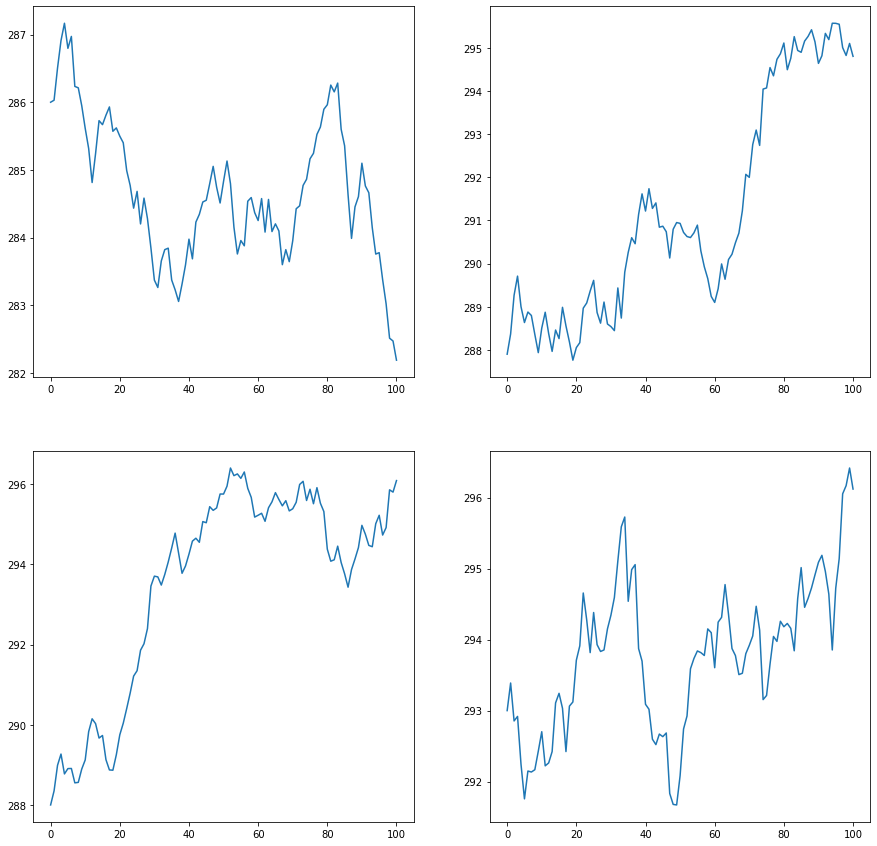

In [10]:
# Run the simulations and plot the results
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)
plt.plot(ebm_ice_albedo(286, Q=341.3, Cw=2*10e8, tau=0.608, years=100)[0].T)
plt.subplot(2, 2, 2)
plt.plot(ebm_ice_albedo(287.9, Q=341.3, Cw=2*10e8, tau=0.608, years=100)[0].T)
plt.subplot(2, 2, 3)
plt.plot(ebm_ice_albedo(288, Q=341.3, Cw=2*10e8, tau=0.608, years=100)[0].T)
plt.subplot(2, 2, 4)
plt.plot(ebm_ice_albedo(293, Q=341.3, Cw=2*10e8, tau=0.608, years=100)[0].T)


**Extend the model with a simple ice/land use albedo parameterisation. (linear version)**

**Task 6:** In this parameterisation, the albedo is solely a function of mean temperature. We assume a simple linear relation according to

\begin{align}
    f(x)= 
\begin{cases}
    \alpha_i,& \text{if } T\leq T_i\\
    \alpha_g,& \text{if } T \geq T_g\\
    \alpha_g+b(T_g-T) & \text{if } T_i<T<T_g
\end{cases}
\end{align}

with $T_i$=273 K, and $T_g$= 292 K. Run the energy balance model for 100 years with four different initial conditions for T(0)=286.0, 287.9, 288.0, and 293.0 K, while fixing the other parameters to $C_w$= 2$\cdot10^8$ J/(m$^2 \cdot$ K), and $\tau_{mean}$=0.608, $a_i$=0.6, and $a_g$=0.2. 

What can be said about the state of equilibrium?

In [11]:
import random
import numpy as np
import matplotlib.pyplot as plt


def ebm_ice_albedo_2(T0, Q=341.3, Cw=10e8, alpha=0.3, tau=0.608, years=100):

    def step_forward_albedo_sig(Q, T, Cw, tau, dt):
        if T <= 273:
            alpha = 0.6
        elif T >= 292:
            alpha = 0.2
        else:
            alpha = 0.6 + (0.2-0.6)/(292-273) * (T - 273)

        temp = (ASR(alpha, Q) - OLR(T, tau)) * dt / Cw + T
        return temp, alpha
    
    temps_arr = np.empty(years + 1)
    albedo_arr = np.empty(years + 1)
    years_arr = np.arange(0, years+1)

    temps_arr[0] = T0
    dt = 365 * 24 * 60 * 60
    
    for idx, temp_now in enumerate(temps_arr[:-1]):
        #tau_rand = np.random.normal(tau, tau/10)
        tau_rand = tau

        temps_arr[idx + 1] = step_forward_albedo_sig(Q, temp_now, Cw, tau_rand, dt)[0]
        albedo_arr[idx + 1] = step_forward_albedo_sig(Q, temp_now, Cw, tau_rand, dt)[1]
    return temps_arr, years_arr, albedo_arr

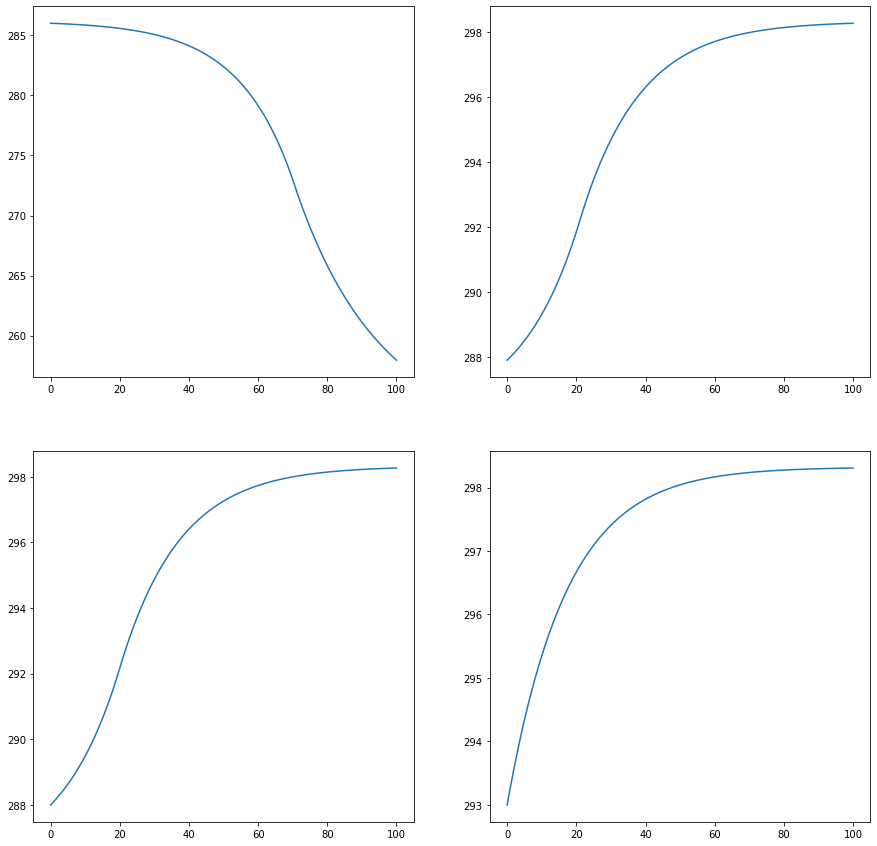

In [12]:
# Run the simulations and plot the results
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)
plt.plot(ebm_ice_albedo_2(286, Q=341.3, Cw=2*10e8, tau=0.608, years=100)[0].T)
plt.subplot(2, 2, 2)
plt.plot(ebm_ice_albedo_2(287.9, Q=341.3, Cw=2*10e8, tau=0.608, years=100)[0].T)
plt.subplot(2, 2, 3)
plt.plot(ebm_ice_albedo_2(288, Q=341.3, Cw=2*10e8, tau=0.608, years=100)[0].T)
plt.subplot(2, 2, 4)
plt.plot(ebm_ice_albedo_2(293, Q=341.3, Cw=2*10e8, tau=0.608, years=100)[0].T)

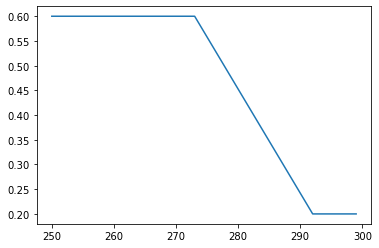

In [13]:
def alpha_from_t(T):
    if T <= 273:
        alpha = 0.6
    elif T >= 292:
        alpha = 0.2
    else:
        alpha = 0.6 + (0.2-0.6)/(292-273) * (T - 273)
    return alpha

plt.plot(range(250,300), [alpha_from_t(i) for i in range(250, 300)])

**Task 7:** Determine the equilibrium climate sensitivity (ECS) and the feedback factor for the simulation from Task 5 using T(0)=289 K.  (sigmoid albedo parametrisation)

In [127]:
import random
import numpy as np
import matplotlib.pyplot as plt


def ebm_ice_albedo_stochastic_ECS(T0, Q=341.3, Cw=10e8, alpha=0.3, tau=0.608, years=100,
                                  dynamic_albedo=True, rand_tau=True):

    def step_forward_olr(Q, T, Cw, tau, dt, dynamic_albedo):
        """
        if T <= 273:
            alpha = 0.6
        elif T >= 292:
            alpha = 0.2
        else:
            alpha = 0.6 + (0.2-0.6)/(292-273) * (T - 273)
        """
        if dynamic_albedo:
            alpha = .3 * (1 - 0.2 * np.tanh(0.5*(T-288)))
        else:
            alpha = .3
        temp = (ASR(alpha, Q) - OLR(T, tau)) * dt / Cw + T
        return temp, (ASR(alpha, Q) - OLR(T, tau))
    
    temps_arr = np.empty(years + 1)
    olr_arr = np.empty(years + 1)
    years_arr = np.arange(0, years+1)
    
    d_temp_arr = np.empty(years)
    d_olr_arr = np.empty(years)

    temps_arr[0] = T0
    dt = 365 * 24 * 60 * 60
    
    for idx, temp_now in enumerate(temps_arr[:-1]):
        if rand_tau:
            tau_now = np.random.normal(tau, tau*.1)
        else:
            tau_now = tau
        
        temps_arr[idx + 1] = step_forward_olr(Q, temp_now, Cw, tau_now, dt, dynamic_albedo)[0]
        olr_arr[idx + 1] = step_forward_olr(Q, temp_now, Cw, tau_now, dt, dynamic_albedo)[1]
        
        d_temp_arr[idx] = temps_arr[idx + 1] - temps_arr[0]
        d_olr_arr[idx] = olr_arr[idx + 1]
    
    ecs_arr = d_olr_arr / d_temp_arr
    return temps_arr, d_temp_arr, d_olr_arr, ecs_arr

1.129305550798354 -0.8264637439647299
0.7318335975418412


(array([ 2.,  5., 16., 24., 43., 37., 43., 28., 28., 51., 58., 54., 32.,
        30., 29., 16.,  1.,  3.,  0.,  1.]),
 array([271.92676119, 273.90285089, 275.87894059, 277.85503029,
        279.83112   , 281.8072097 , 283.7832994 , 285.7593891 ,
        287.7354788 , 289.7115685 , 291.6876582 , 293.6637479 ,
        295.6398376 , 297.6159273 , 299.592017  , 301.5681067 ,
        303.54419641, 305.52028611, 307.49637581, 309.47246551,
        311.44855521]),
 <BarContainer object of 20 artists>)

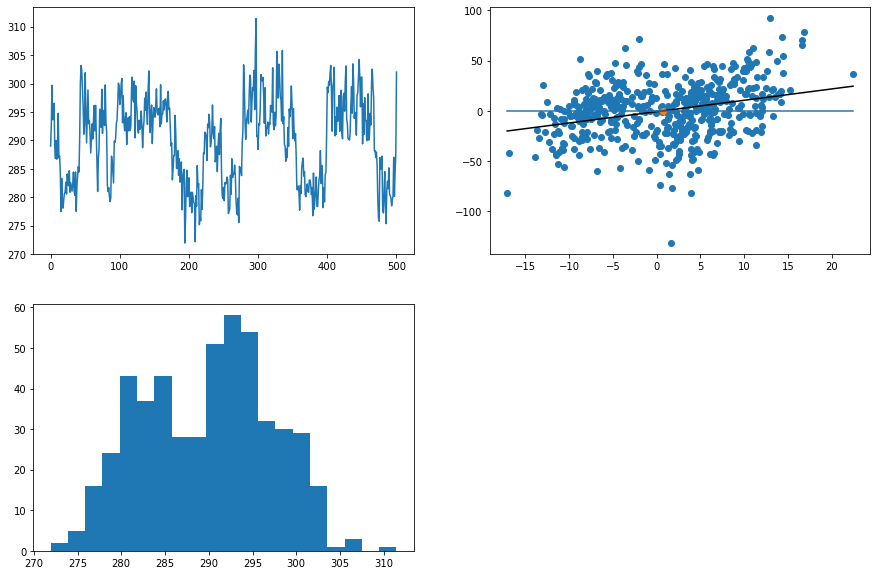

In [135]:
temps, d_temp, d_olr, ecs = ebm_ice_albedo_stochastic_ECS(289, Q=341.3, Cw=2*10**8, alpha=0.3, tau=0.608, years=500,
                                                         dynamic_albedo=True, rand_tau=True)

a, b = np.polyfit(d_temp[1:], d_olr[1:], 1)
print(a, b)
print(-b/a)
line_min = a* d_temp.min() + b
line_max = a* d_temp.max() + b

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(temps)

plt.subplot(2, 2, 2)
plt.plot([d_temp.min(), d_temp.max()], [line_min, line_max], 'k')
plt.plot([d_temp.min(),d_temp.max()], [0,0])
plt.scatter(d_temp[1:], d_olr[1:])
plt.scatter(-b/a, 0, s=)

# bimodal distribution, normal portion 
plt.subplot(2, 2, 3)
plt.hist(temps, bins=20)

In [116]:
temps, d_temp, d_olr, ecs = ebm_ice_albedo_stochastic_ECS(289, Q=341.3, Cw=2*10**8, alpha=0.3, tau=0.608, years=20)
a, b = np.polyfit(d_temp[1:], d_olr[1:], 1)
print(a, b)
print(-b/a)
line_min = (, a*0 + b)
line_max = a*7 + b

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(temps)
plt.subplot(1, 2, 2)
plt.plot([0, 7], [line_min, line_max])
plt.plot([0,7], [0,0])
plt.scatter(d_temp[1:], d_olr[1:])
plt.scatter(-b/a, 0)

SyntaxError: invalid syntax (<ipython-input-116-e7de9cc30c9f>, line 5)

In [ ]:
# Run the simulations and plot the results

plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)a
plt.plot(ebm_ice_albedo_2(286, Q=341.3, Cw=2*10e8, tau=0.608, years=100)[0].T)
plt.subplot(2, 2, 2)
plt.plot(ebm_ice_albedo_2(287.9, Q=341.3, Cw=2*10e8, tau=0.608, years=100)[0].T)
plt.subplot(2, 2, 3)
plt.plot(ebm_ice_albedo_2(288, Q=341.3, Cw=2*10e8, tau=0.608, years=100)[0].T)
plt.subplot(2, 2, 4)
plt.plot(ebm_ice_albedo_2(293, Q=341.3, Cw=2*10e8, tau=0.608, years=100)[0].T)

**Task 8:** Repeat the simulation from Task 5 (sigmoid function for albedo) with T(0)=289 K, but again sample the transmissivity from a normal distribution with a standard deviation of 10%.  

What special feature can now be observed? What conclusions can be inferred regarding the prediction of weather and climate?

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt


def ebm_ice_albedo_stochastic(T0, Q=341.3, Cw=10e8, alpha=0.3, tau=0.64, years=100):
    # Write your code here
    pass

In [ ]:
# Plot the results

In [ ]:
# Make more plots to illustrate the characteristics of the time series